# Project 2: Ames Housing Data and Kaggle Challenge

## Part I - Problem Setup and Data Cleaning

Author: Charles Ramey

Date: 03/19/2023

---

## Problem Statement

For home sellers and their real estate agents, setting the initial asking price for a home is often one of the most difficult stages of the selling process. There are several tools for establishing a market value for the home, and once it is established, sellers and their agent may choose to price the home above or below that market value for various reasons, often strategic. Choosing and implementing a pricing strategy that will maximize the value sellers get for their home begins by setting an accurate market value. This project aims to use machine learning and the comprehensive Ames housing dataset to create a general model for predicting the sale value of a home, and give home sellers and their agents a reasonable baseline for dictating the initial asking price.

#### Links

For modeling, see the following notebooks:
- [`Part-2.1_model-iteration-1.ipynb`](../code/Part-2.1_model-iteration-1.ipynb)
- [`Part-2.2_model-iteration-2.ipynb`](../code/Part-2.2_model-iteration-2.ipynb)
- [`Part-2.3_model-iteration-3.ipynb`](../code/Part-2.3_model-iteration-3.ipynb)

To see the conclusions and recommendations of this project, see the following notebook:
- [`Part-3_conclusion-and-recommendations.ipynb`](../code/Part-3_conclusion-and-recommendations.ipynb)

### Contents

- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Sources](#Sources)

## Background

There are a variety of reasons that a home might sell at a different price than the asking price. Home owners believe in the value of their property, and may insist on starting with an asking price above what the market may dictate. In fact, about [38% of recent sellers reported reducing the asking price at least once](https://www.nar.realtor/research-and-statistics/quick-real-estate-statistics). Inversely, many sellers take advantage of the [real estate pricing pyramid](https://palermolistings.com/market-data/the-great-pyramid-of-real-estate) and opt for a strategy of pricing their home 10-15% below market value to increase the pool of potential buyers to 75-90%. Growing the buyer pool can lead to more offers, and ultimately drive the price of the home up. Regardless of the strategy, the home selling process almost always begins with establishing the market value of the home.

To determine "market value", agents will typically perform what is called a [Comparative Market Analysis](https://www.investopedia.com/terms/c/comparative-market-analysis.asp#:~:text=A%20comparative%20market%20analysis%20(CMA)%20is%20an%20estimate%20of%20a,for%20the%20property%20and%20comparables.), or CMA. A CMA is an evaluation of recent sales of comparable homes to get an idea of what a home might sell for in the current market. Real estate agents have conducted CMA's for a long time, and has only become easier with the internet and [mutiple listing services](https://www.nar.realtor/nar-doj-settlement/multiple-listing-service-mls-what-is-it). However, with limited time and resources, agents are typically only able to evaluate a handful of comprable home sales, and in many cases there may not be a truly "comparable" home sale. By using a machine learning model and aggregate housing and sale data, a real estate agent could get a good approximation of a home's value, without the burdern of identifying comparable homes that have sold recently.

### Datasets

- [`train.csv`](https://www.kaggle.com/competitions/221-ames-competition/data?select=test.csv): Ames housing data used to train the model.
- [`test.csv`](https://www.kaggle.com/competitions/221-ames-competition/data?select=test.csv): Ames housing data used to test the model's accuracy. In this project, this data will also represent potential home listing for a real estate agent.

### Disclaimer

During the creation of this notebook and the analysis contained herein, the author frequently referenced available documentation for imported libraries. Much of the coding syntax within this notebook is derived from various online sources, including stackoverflow and other public forums. The author does not claim the following code as fully original, and sources are cited where possible.

## Data Import and Cleaning

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

Below, a directory is created to store the results of the models.

In [2]:
# os.mkdir('../prediction_results')

### Data Import

The first code block below imports the two datasets used within this analysis and defines the dataframes with labels that are easy to reference. Each dataframe is cleaned and condensed in the following section.

In [3]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

The `df_test` dataframe contains 80 columns compared to the 81 columns contained in `df_train` because it does not contain `saleprice` data.

### Cleaning

To make the column headers easier to use in the remainder of the notebook, the headers are converted to snake case.

In [5]:
df_train.columns = df_train.columns.str.lower().str.replace(' ','_')
df_test.columns = df_test.columns.str.lower().str.replace(' ','_')

In [6]:
df_train.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

In [7]:
set(df_train.columns) - set(df_test.columns)

{'saleprice'}

Here, we've verified that the mismatched column is indeed `saleprice`.

In [8]:
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
dtype: int64

Above, the dataframe is checked for null values. We find that several columns contain entries with null values, ranging from 1 to 2042 null entries. For this analysis, we will not attempt to impute missing values, so all columns containing null values are dropped from the training dataset in the cell below.

In [9]:
# train.dropna(axis=1, thresh=(len(train)-2), inplace=True)
df_train.dropna(axis=1, inplace=True)

In [10]:
df_train.shape, df_test.shape

((2051, 55), (878, 80))

After dropping columns with null values from the training dataset, we now have more columns remaining in the test dataset. If we attempted to columns with null values from the test data the same way that we did above for the training data, we may accidentally drop differnet columns since the datasets make contain null values in different columns. Instead, we set the redefine the test dataframe to include the same columns as the training dataset, less the `saleprice` column.

In [11]:
df_test = df_test[[col for col in df_train.columns if col != 'saleprice']].copy()

In [12]:
df_train.shape, df_test.shape

((2051, 55), (878, 54))

Once again, we have balanced dataframes. The cell below double checks that all columns containing null values have been removed from the training data.

In [13]:
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

Series([], dtype: int64)

### Save Cleaned Dataframes

Having cleaned the data to our liking, we'll now save the cleaned dataframes so we can easily read them into our modeling notebooks.

In [14]:
df_train.to_csv('../datasets/train_cleaned.csv', index=False)
df_test.to_csv('../datasets/test_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

Before diving into the preprocessing and modeling, we'll take a quick look at some of the summary statistics to get a better understanding of the data we're working with. Below, we can see the shape of our training dataframe, as well as details about the types of data contained in each column.  More about these features can be found in the data dictionary, [here](https://www.kaggle.com/competitions/221-ames-competition/data).

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2051 non-null   int64 
 1   pid              2051 non-null   int64 
 2   ms_subclass      2051 non-null   int64 
 3   ms_zoning        2051 non-null   object
 4   lot_area         2051 non-null   int64 
 5   street           2051 non-null   object
 6   lot_shape        2051 non-null   object
 7   land_contour     2051 non-null   object
 8   utilities        2051 non-null   object
 9   lot_config       2051 non-null   object
 10  land_slope       2051 non-null   object
 11  neighborhood     2051 non-null   object
 12  condition_1      2051 non-null   object
 13  condition_2      2051 non-null   object
 14  bldg_type        2051 non-null   object
 15  house_style      2051 non-null   object
 16  overall_qual     2051 non-null   int64 
 17  overall_cond     2051 non-null   

In [16]:
df_train.describe()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


From the summary statistics above, we can see that the average sale price is `~$180,000`. But let's take a look at how sale prices are actually distributed.

Below, we can see a steep peak around `~$150,000`. However, we can see that the data is right-skewed with a small numer of homes selling for more the `$400,000`.

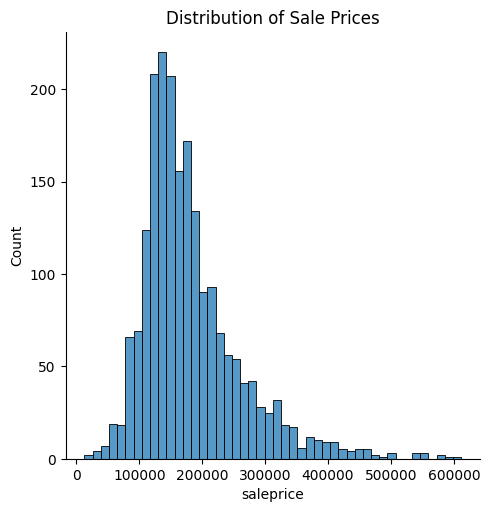

In [17]:
sns.displot(data=df_train['saleprice']).set(title='Distribution of Sale Prices');

Let's also take a peak at the relationship between sale price and a few categories we might expect to be correlated to price. Here, we'll look at:
- Lot Area
- Overall Quality
- Overall Condition
- 1st Floor Square Footage
- 2nd Floor Square Footage

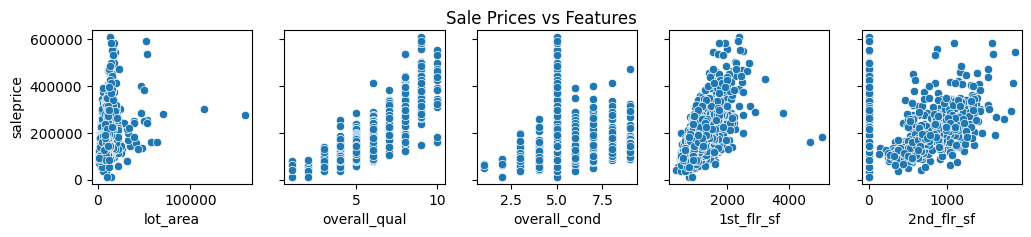

In [18]:
df = df_train[['lot_area','overall_qual','overall_cond','1st_flr_sf','2nd_flr_sf','saleprice']]

fig, axs = plt.subplots(1, 5, figsize = (12, 2), sharey = True)

for i in range(5):
    sns.scatterplot(x=df[df.columns[i]], y=df_train['saleprice'], ax = axs[i])\
        # .set(title = ads.columns[i])
    
plt.suptitle('Sale Prices vs Features');

We can see a vaguely positive relationship for each of these features, so we'll train our first set of models on these features to start simple.

## Sources

1. [https://www.nar.realtor/research-and-statistics/quick-real-estate-statistics](https://www.nar.realtor/research-and-statistics/quick-real-estate-statistics)
2. [https://palermolistings.com/market-data/the-great-pyramid-of-real-estate](https://palermolistings.com/market-data/the-great-pyramid-of-real-estate)
3. [https://www.investopedia.com/terms/c/comparative-market-analysis](https://www.investopedia.com/terms/c/comparative-market-analysis.asp#:~:text=A%20comparative%20market%20analysis%20(CMA)%20is%20an%20estimate%20of%20a,for%20the%20property%20and%20comparables.)
4. [https://www.nar.realtor/nar-doj-settlement/multiple-listing-service-mls-what-is-it](https://www.nar.realtor/nar-doj-settlement/multiple-listing-service-mls-what-is-it)
5. [https://www.kaggle.com/competitions/221-ames-competition/data](https://www.kaggle.com/competitions/221-ames-competition/data)
6. [https://pandas.pydata.org/docs/reference/index.html](https://pandas.pydata.org/docs/reference/index.html)
7. [https://scikit-learn.org/stable/modules/classes.html](https://scikit-learn.org/stable/modules/classes.html)
8. [https://matplotlib.org/stable/api/index.html](https://matplotlib.org/stable/api/index.html)
9. [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)
10. [https://stackoverflow.com/questions](https://stackoverflow.com/questions)